In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Calculate the threshold voltage for Na and T according to this paper: https://arxiv.org/pdf/1904.09911.pdf (Equation 3)


In [2]:
def threshold_voltage(Na, T):
    tox = 20e-9 #Oxide Thickness
    k = 8.6e-5 # Boltzman
    Ea = .045 #Acceptor energy level
    epsilon = 11.68*8.85e-12
    epsilon_ox = 3.9*8.85e-12
    q = 1.6e-19

    Cox = epsilon_ox/tox
    BG = 1.166 - (4.73e-4)*(T**2)/(T+636) #Bandgap temp dependence
    BG_300 = 1.166 - (4.73e-4)*(300**2)/(300+636) #Bandgap at 300K
    Ut = k*T

    Nc = 1.73e16*(T)**(3/2) #Density of states temp dependence
    Nv = 4.8e15*(T)**(3/2)
    ni = np.sqrt(Nc*Nv)*np.exp(-BG/(2*k*T)) #Intrinsic carrier density temp dependence

    phi_f = Ut*np.log(Na/ni)
    alpha = 4*np.exp(-(.5*BG-Ea)/(k*T)) #Weird factor handling inomplete ionization
    del_phi = Ut*np.log(.5*(1+np.sqrt(1+(4*alpha*Na/ni))))
    phi_star = phi_f-del_phi
    gamma = (np.sqrt(2*q*Na*1e6*epsilon)/Cox) #Just grouping terms
    phi_m_p = 4.1-(4.05+.5*BG_300) # They say there is poor data on affinity at low temps. 
                                   # We assume that it changes by the same amount as the bandgap
                                   # so there's no temp dependence here. Strange.

    Vt = 2*phi_f-del_phi+phi_m_p-phi_star+gamma*np.sqrt(2*phi_f-del_phi)
    return Vt

## Vt temperature dependence when Na = 3e16

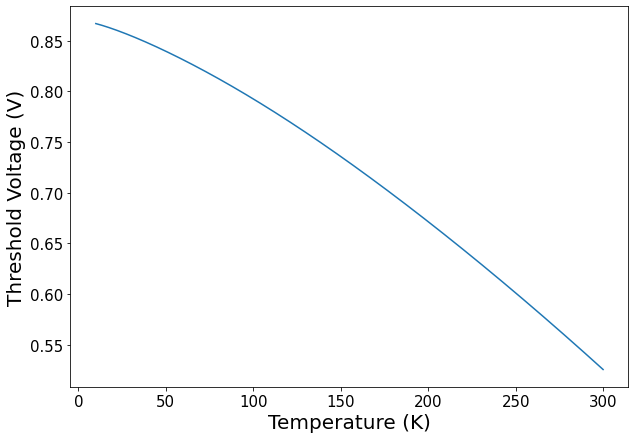

In [12]:
Na = 5e16
T = np.linspace(10, 300, 500)
Vt = threshold_voltage(Na, T)
plt.figure(figsize=[10,7])
plt.plot(T, Vt)
plt.xlabel('Temperature (K)', fontsize=20)
plt.ylabel('Threshold Voltage (V)', fontsize=20)
plt.tick_params(labelsize=15)

## Threshold Voltage as a function of Na at 300K and 10K

In [4]:
Na = np.geomspace(1e15, 5e17, 50)
Vt_300k = threshold_voltage(Na, 300)
Vt_10k = threshold_voltage(Na, 10)

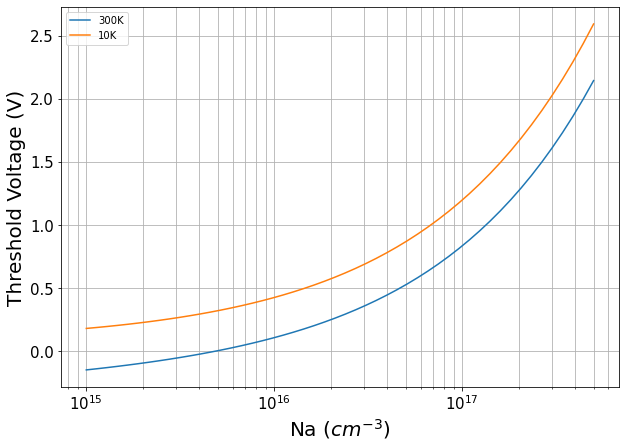

In [9]:
plt.figure(figsize=[10,7])
plt.semilogx(Na, Vt_300k, label = "300K")
plt.semilogx(Na, Vt_10k, label = "10K")
plt.legend()
plt.xlabel('Na ($cm^{-3}$)', fontsize=20)
plt.ylabel('Threshold Voltage (V)', fontsize=20)
plt.tick_params(labelsize=15)
plt.grid('both', which = 'both')